In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pathlib import Path
from read_roi import read_roi_zip
from collections import OrderedDict, Counter
import math
import PIL
from PIL import Image
from PIL.TiffTags import TAGS
import tkinter as tk
from tkinter import filedialog
import seaborn as sns
from pandas.api.types import CategoricalDtype
import scipy as sp
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color

In [2]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)
path

WindowsPath('D:/results/2021_WT_R303X_residence')

In [3]:
spots = pd.read_csv(path/'Spots in tracks statistics.csv', encoding='utf-8')
data = pd.read_csv(path/'Track statistics.csv', encoding='utf-8')

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\results\\2021_WT_R303X_residence\\Spots in tracks statistics.csv'

In [4]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
yellow = '#FFCB05'

In [40]:
data

,Label,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,LONGEST_GAP,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,TRACK_DURATION,TRACK_START,...,TRACK_MEAN_SPEED,TRACK_MAX_SPEED,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY
0,Track_0,0,6,0,0,0,0,0,5,0,...,0.911,1.131,0.461,0.990,0.264,7.163,9.017,6.040,7.205,1.221
1,Track_1,1,2,0,0,0,0,0,1,0,...,1.193,1.193,1.193,1.193,NaN,6.810,7.181,6.439,7.181,0.371
2,Track_2,2,16,0,0,0,0,0,15,0,...,0.609,0.996,0.280,0.617,0.209,8.402,11.113,6.010,8.109,1.742
3,Track_3,3,3,0,0,0,0,0,2,0,...,0.813,1.408,0.219,1.408,0.841,7.682,8.385,6.369,8.290,0.929
4,Track_4,4,8,0,0,0,0,0,7,0,...,0.778,1.330,0.296,0.684,0.349,10.105,11.221,8.314,10.401,0.905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12000,Track_12000,12000,2,0,0,0,0,0,1,399,...,0.773,0.773,0.773,0.773,NaN,8.254,9.123,7.385,9.123,0.869
12001,Track_12001,12001,2,0,0,0,0,0,1,399,...,0.949,0.949,0.949,0.949,NaN,6.501,6.684,6.318,6.684,0.183
12002,Track_12002,12002,2,0,0,0,0,0,1,399,...,0.867,0.867,0.867,0.867,NaN,6.172,6.247,6.097,6.247,0.075
12003,Track_12003,12003,2,0,0,0,0,0,1,399,...,0.525,0.525,0.525,0.525,NaN,7.628,8.533,6.723,8.533,0.905


In [41]:
def open_roi_line(name):
    roi_path = path/(name)

    roi_data = read_roi_zip(roi_path)
    roi_df = pd.DataFrame(columns=['Track ID','x1','x2','y1','y2'])
    for key in roi_data:
        roi_df = roi_df.append({'Track ID': roi_data[key]['name'],'x1': roi_data[key]['x1'],'x2': roi_data[key]['x2'],'y1': roi_data[key]['y1'],'y2': roi_data[key]['y2']}, ignore_index=True)
    return roi_df

In [43]:
lines = open_roi_line('kymolines.zip')

In [44]:
def mask_dots(lines):
    maskdotsx = []
    maskdotsy = []
    for i in list(lines.index):
        maskdotsx = maskdotsx + list(np.linspace(lines['x1'][i],lines['x2'][i],25))
        maskdotsy = maskdotsy + list(np.linspace(lines['y1'][i],lines['y2'][i],25))
    return maskdotsx,maskdotsy

In [45]:
maskdots = mask_dots(lines)
len(maskdots[0])

1375

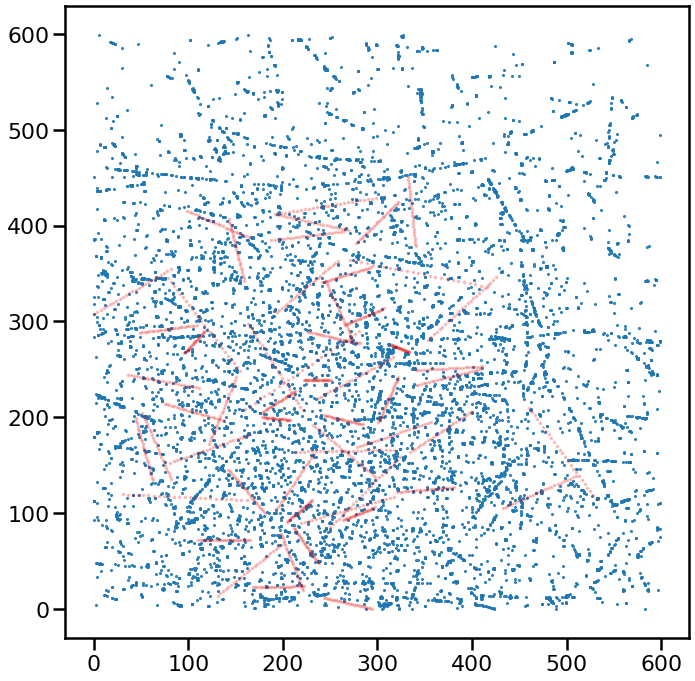

In [46]:
x=data['TRACK_X_LOCATION']
y=data['TRACK_Y_LOCATION']
scattersize = 1
cap = 5
fig, ax = plt.subplots(1,1,figsize=(7.45*1.5,7.75*1.5))
ax.scatter(x , y , s = scattersize)
ax.scatter(maskdots[0] , maskdots[1], color=red,s = scattersize*3, alpha=0.2);

In [47]:
i= 0
R = 2
xy = data[['TRACK_X_LOCATION','TRACK_Y_LOCATION']]
square = xy[(xy['TRACK_X_LOCATION']<(maskdots[0][i]+R)) & (xy['TRACK_X_LOCATION']>(maskdots[0][i]-R)) 
                    & (xy['TRACK_Y_LOCATION']<(maskdots[1][i]+R)) & (xy['TRACK_Y_LOCATION']>(maskdots[1][i]-R))]
square

,TRACK_X_LOCATION,TRACK_Y_LOCATION


In [48]:
def filter_maskroi(data,maskdots,R):
    
    xy = data[['TRACK_X_LOCATION','TRACK_Y_LOCATION']]
    squareindex = []
    
    for i in np.arange(0,len(maskdots[0])): #

        square = xy[(xy['TRACK_X_LOCATION']<(maskdots[0][i]+R)) & (xy['TRACK_X_LOCATION']>(maskdots[0][i]-R)) 
                    & (xy['TRACK_Y_LOCATION']<(maskdots[1][i]+R)) & (xy['TRACK_Y_LOCATION']>(maskdots[1][i]-R))]
        
        squareindex0 = list(square.index)
        
        squareindex = squareindex + squareindex0
        
    squareindex = list(set(squareindex))
    
    data0 = data[data.index.isin(squareindex)]
        
    return data0

643


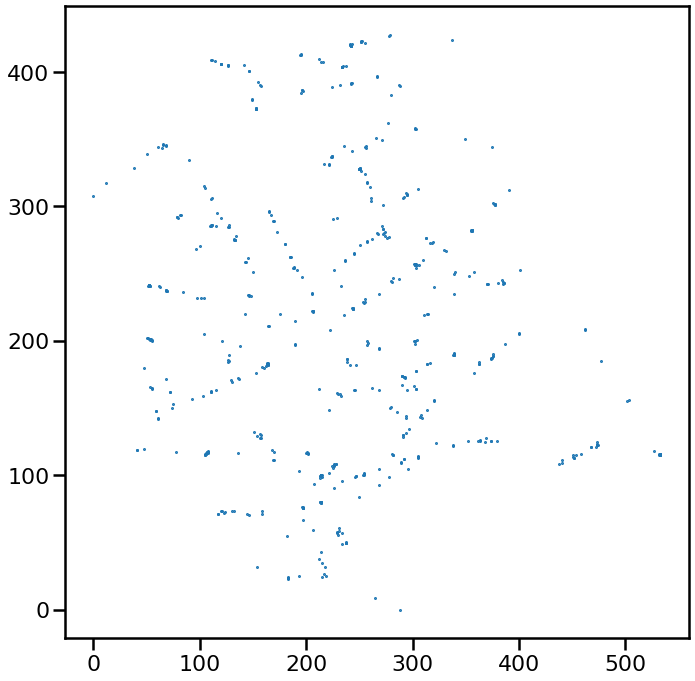

In [49]:
data0 = filter_maskroi(data,maskdots,R)
print(len(data0))
x=data0['TRACK_X_LOCATION']
y=data0['TRACK_Y_LOCATION']
fig, ax = plt.subplots(1,1,figsize=(7.45*1.5,7.75*1.5))
ax.scatter(x , y , s = scattersize)

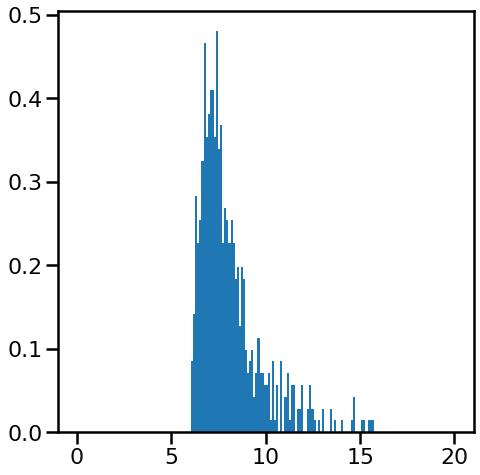

In [50]:
y=data0['TRACK_MEAN_QUALITY']
scattersize = 1
cap = 5
fig, ax = plt.subplots(1,1,figsize=(7.45,7.75))
ax.hist(y, bins=np.arange(0, 20 + 0.11, 0.11), density=True);

In [51]:
min_duration = 3
startstop = 2
lastframe = data['TRACK_STOP'].max()
data1 = data0[(data0['TRACK_START']>=startstop) & (data0['TRACK_STOP']<=(lastframe-startstop)) & (data0['TRACK_DURATION']>=min_duration)]
data1

,Label,TRACK_ID,NUMBER_SPOTS,NUMBER_GAPS,LONGEST_GAP,NUMBER_SPLITS,NUMBER_MERGES,NUMBER_COMPLEX,TRACK_DURATION,TRACK_START,...,TRACK_MEAN_SPEED,TRACK_MAX_SPEED,TRACK_MIN_SPEED,TRACK_MEDIAN_SPEED,TRACK_STD_SPEED,TRACK_MEAN_QUALITY,TRACK_MAX_QUALITY,TRACK_MIN_QUALITY,TRACK_MEDIAN_QUALITY,TRACK_STD_QUALITY
224,Track_224,224,4,0,0,0,0,0,3,2,...,1.338,1.700,1.097,1.216,0.319,9.833,11.213,9.002,9.622,0.830
320,Track_320,320,5,0,0,0,0,0,4,4,...,0.927,1.333,0.246,1.323,0.517,7.827,8.981,6.754,7.466,0.857
509,Track_509,509,6,0,0,0,0,0,5,8,...,0.495,0.780,0.166,0.423,0.268,8.447,11.305,6.455,8.530,1.618
530,Track_530,530,30,2,1,0,0,0,31,9,...,0.490,1.075,0.132,0.462,0.220,10.103,14.556,6.171,9.999,2.040
591,Track_591,591,14,1,1,0,0,0,14,11,...,0.486,1.056,0.144,0.431,0.306,8.737,12.099,6.192,8.307,1.757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11624,Track_11624,11624,10,2,1,0,0,0,11,384,...,0.764,1.266,0.147,0.770,0.366,7.642,9.052,6.190,8.134,0.992
11636,Track_11636,11636,12,1,1,0,0,0,12,384,...,0.633,1.664,0.245,0.533,0.431,10.177,15.125,7.277,11.032,2.631
11662,Track_11662,11662,12,1,1,0,0,0,12,385,...,0.616,1.155,0.311,0.510,0.284,8.863,11.260,6.301,8.843,1.211
11753,Track_11753,11753,6,0,0,0,0,0,5,389,...,0.498,1.078,0.086,0.367,0.387,7.924,9.969,6.013,8.437,1.445


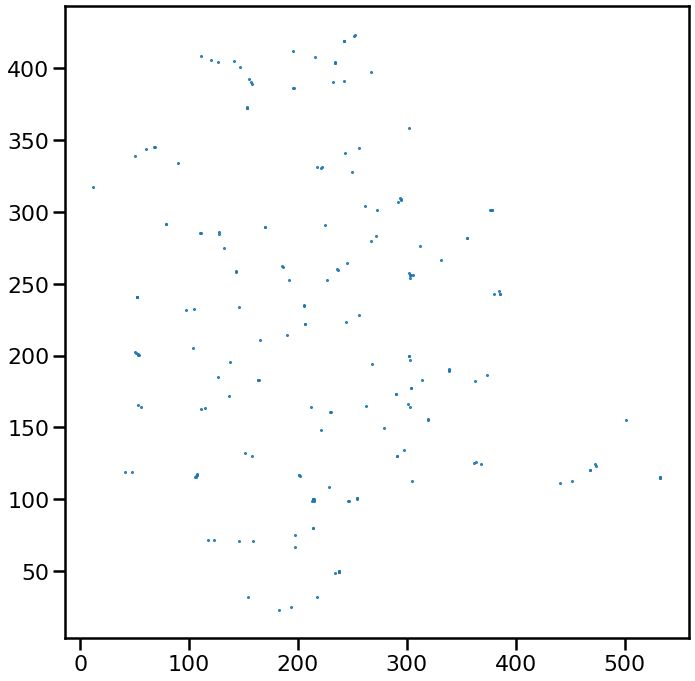

In [52]:
x=data1['TRACK_X_LOCATION']
y=data1['TRACK_Y_LOCATION']
fig, ax = plt.subplots(1,1,figsize=(7.45*1.5,7.75*1.5))
ax.scatter(x , y , s = scattersize)

In [53]:
def filter_neighbors(data0,R,N,iterations):
    
    for k in range(iterations):
        xy = data0[['TRACK_X_LOCATION','TRACK_Y_LOCATION']]
        for i in list(xy.index): #

            xyvalue = xy.loc[i].values
            xvalue = xyvalue[0]
            yvalue = xyvalue[1]

            square = xy[(xy['TRACK_X_LOCATION']<(xvalue+R)) & (xy['TRACK_X_LOCATION']>(xvalue-R)) & (xy['TRACK_Y_LOCATION']<(yvalue+R)) & (xy['TRACK_Y_LOCATION']>(yvalue-R))]

            if (len(square) < N):
                try:
                    data0 = data0.drop(square.index)
                except KeyError:
                     continue

    return data0

In [54]:
# data1 = filter_neighbors(data0,10,2,1)

# x=data1['TRACK_X_LOCATION']
# y=data1['TRACK_Y_LOCATION']
# fig, ax = plt.subplots(1,1,figsize=(7.45*1.5,7.75*1.5))
# ax.scatter(x , y , s = scattersize)

## Spots ##

In [55]:
spots

,Label,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,MANUAL_COLOR,MEAN_INTENSITY,MEDIAN_INTENSITY,MIN_INTENSITY,MAX_INTENSITY,TOTAL_INTENSITY,STANDARD_DEVIATION,ESTIMATED_DIAMETER,CONTRAST,SNR
0,ID7836533,7836533,0,6.040,86.841,166.388,0,0,0,2.5,...,-10921639,177.865,177,136,231,6581,16.530,8.870,0.019,0.407
1,ID7835779,7835779,0,8.548,87.151,166.731,0,1,1,2.5,...,-10921639,176.784,173,140,231,6541,17.224,5.931,0.026,0.524
2,ID7835395,7835395,0,9.017,86.110,166.289,0,2,2,2.5,...,-10921639,183.757,183,155,225,6799,15.905,9.088,0.030,0.662
3,ID7836158,7836158,0,6.067,86.292,167.331,0,3,3,2.5,...,-10921639,179.568,180,149,211,6644,14.303,9.016,0.019,0.457
4,ID7836901,7836901,0,7.205,87.100,166.901,0,4,4,2.5,...,-10921639,182.649,183,148,215,6758,12.813,9.023,0.031,0.862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65904,ID7942347,7942347,12002,6.097,294.365,576.037,0,400,400,2.5,...,-10921639,154.216,153,128,191,5706,13.774,5.990,0.023,0.496
65905,ID7942148,7942148,12003,6.723,289.959,585.218,0,399,399,2.5,...,-10921639,159.162,159,131,188,5889,12.833,9.079,0.023,0.557
65906,ID7942349,7942349,12003,8.533,290.436,584.999,0,400,400,2.5,...,-10921639,157.838,157,124,187,5840,14.934,2.000,0.023,0.469
65907,ID7942023,7942023,12004,6.974,254.693,227.980,0,399,399,2.5,...,-10921639,173.514,176,135,196,6420,13.382,6.446,0.027,0.676


In [67]:
trackID = data1['TRACK_ID']
filteredspots = spots[spots['TRACK_ID'].isin(trackID)]

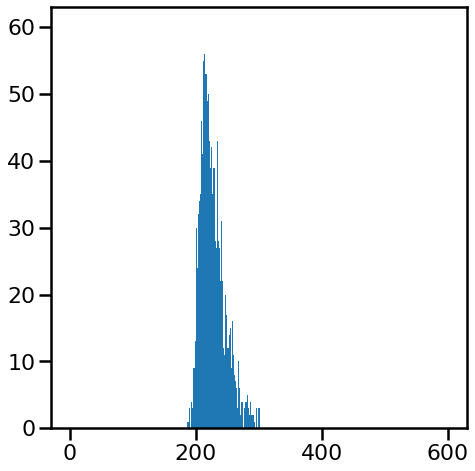

In [68]:
y=filteredspots['MAX_INTENSITY']
fig, ax = plt.subplots(1,1,figsize=(7.45,7.75))
ax.hist(y, bins=np.arange(0, 600 + 1, 1));

119


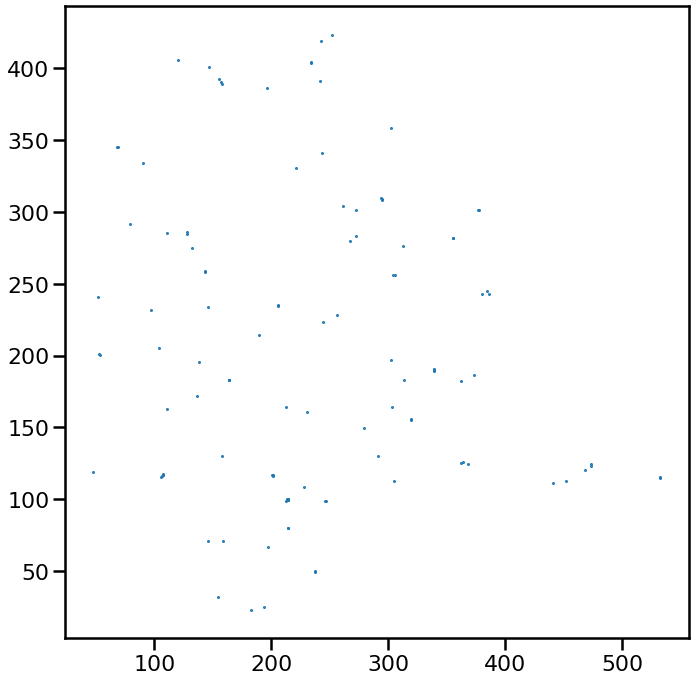

In [69]:
brightspotsID = filteredspots[(filteredspots['MAX_INTENSITY'] < 200) | (filteredspots['MAX_INTENSITY'] > 250)]['TRACK_ID'].unique()
data2 = data1[~data1['TRACK_ID'].isin(brightspotsID)]
print(len(data2))

x=data2['TRACK_X_LOCATION']
y=data2['TRACK_Y_LOCATION']
fig, ax = plt.subplots(1,1,figsize=(7.45*1.5,7.75*1.5))
ax.scatter(x , y , s = scattersize)

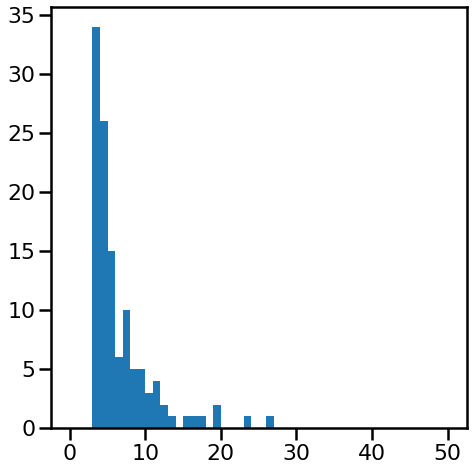

In [70]:
y=data2['TRACK_DURATION']
fig, ax = plt.subplots(1,1,figsize=(7.45,7.75))
ax.hist(y, bins=np.arange(0, 50 + 1, 1));

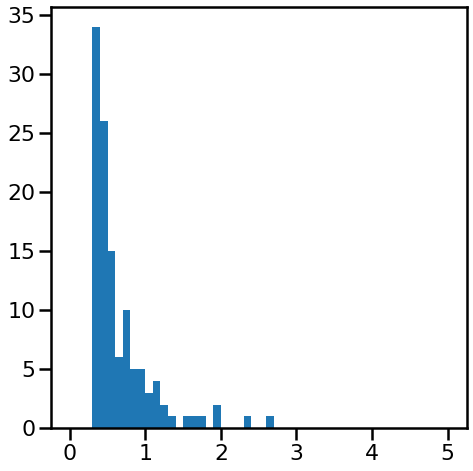

In [71]:
track_duration=data2['TRACK_DURATION']*0.1
fig, ax = plt.subplots(1,1,figsize=(7.45,7.75))
ax.hist(track_duration, bins=np.arange(0, 5 + 0.1, 0.1));

## Exponential Fit ##

In [72]:
def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def equation_fit(track_duration,x):
    
    equation = exponential
        
    results = pd.DataFrame(columns=[] , index=[])
    
    n, bins, patches = ax.hist(track_duration, bins=x, density=True);
                
    coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n)

    variance = np.diagonal(var_matrix) #Refer [3]
    SE = np.sqrt(variance) #Refer [4]

            #======Making a data frame========
    results0 = pd.DataFrame(columns=[] , index=[])
    
    for k in np.arange(0,len(coeff)):
        header = [np.array(['Exponential']),np.array(['Coefficient '+ str(k)])]
        r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
        results0 = pd.concat([results0, r0], axis=1, sort=False)

    results = pd.concat([results, results0], sort=False)

    return results


In [73]:
spf = 0.1
DCXconc=str(100)
DCXType = 'R303X'
xlim = 5
bins = 0.1

x = np.arange(min_duration*spf, xlim + bins, bins)

shift = min_duration*spf

track_duration_shift=(track_duration.add(-shift)) #times 100ms
EqFit = equation_fit(track_duration,x)

#EqFit.loc['Value'] = EqFit.loc['Value'].add((min_duration-1)*spf)

scale = EqFit['Exponential']['Coefficient 0'].loc['Value']
#x0 = EqFit['Exponential']['Coefficient 1'].loc['Value']
EqFit

,Exponential
,Coefficient 0
Value,0.389253
SE,0.133929


In [74]:
true_scale = EqFit['Exponential']['Coefficient 0'].loc['Value']+((min_duration)*spf)
SE = EqFit['Exponential']['Coefficient 0'].loc['SE']
scalestr = str(round(true_scale,1))
SEstr = str(round(SE,2))
scalestr,SEstr

('0.7', '0.13')

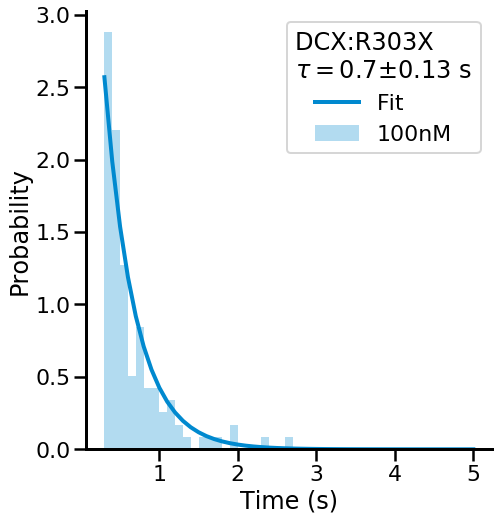

In [75]:
color=cyan

fig, ax = plt.subplots(1,1,figsize=(7.45,7.75))
ax.hist(track_duration, bins=x, density=True,color = color,alpha = 0.3);
ax.plot(x,exponential(x-shift,scale),color = color, lw=4);
ax.set_xlabel('Time (s)')
ax.set_ylabel('Probability')
#ax.set_ylim(0,1.2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)

ax.legend(('Fit',DCXconc + 'nM'),loc='upper right',title='DCX:' + DCXType +' \n' r'$\tau = $' + scalestr + r'$\pm $'  + SEstr + ' s')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
plt.savefig(path/('track-duration_expo-fit.pdf'))